# Metadata Preprocessing 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
samples = pd.read_excel('/content/drive/MyDrive/onko/final_karina.xlsx')

In [4]:
samples['Номер 16s']

0     34
1     15
2     16
3     35
4     63
      ..
65    67
66    44
67    45
68    71
69    43
Name: Номер 16s, Length: 70, dtype: int64

In [5]:
files = pd.read_csv('/content/drive/MyDrive/onko/files.txt')
files.columns = ['filename']

In [6]:
temp_data = files.filename.str.split('_',expand=True)

In [7]:
files['filename_part1'] = temp_data[0]
files['filename_part2'] = temp_data[1]
files['filename_part3'] = temp_data[3]
files['filename_part2'] = files.filename_part2.str.split('S',expand=True)[1]
files['filename_part2'] = files['filename_part2'].astype('int64')
files = files[files['filename_part3'] == 'R1']

In [8]:
files

,filename,filename_part1,filename_part2,filename_part3
0,10b_S23_L001_R1_001.fastq.gz,10b,23,R1
2,11b_S24_L001_R1_001.fastq.gz,11b,24,R1
4,12b_S26_L001_R1_001.fastq.gz,12b,26,R1
6,13b_S28_L001_R1_001.fastq.gz,13b,28,R1
8,14b_S29_L001_R1_001.fastq.gz,14b,29,R1
...,...,...,...,...
132,7b_S19_L001_R1_001.fastq.gz,7b,19,R1
134,80_S68_L001_R1_001.fastq.gz,80,68,R1
136,81_S69_L001_R1_001.fastq.gz,81,69,R1
138,8b_S20_L001_R1_001.fastq.gz,8b,20,R1


In [9]:
data_merged = samples.merge(files, \
                               left_on='Номер 16s', \
                               right_on='filename_part2', \
                               how = 'inner')

In [10]:
data_merged.head(2)

,ФИО,Unnamed: 1,Номер 16s,пол,Возраст,Диагноз,Схема лечения,Объективный ответ,Есть прогр - 1 или нет - 0,Клиническое состояние при прогрессировании,Группа_ХТ-2_ИТ-1,ИТ остановлена_1-да_0-нет,"Сочетание с ХТ (0-нет, 1-да)",1_Уменшение_ИТ_все_есть-1_Нет-0,ВСЕ_ВДП>6 мес,ВСЕ_ИММУНО_ВДП>6 мес,МОНОИММУНО_ВДП>6 мес,Жив - 0/умер - 1,ВДП_мес,ВДП (мес),число введений,Дата достижения ответа (для пр и чр) в циклах,Гистология,filename,filename_part1,filename_part2,filename_part3
0,Габелок Николай Евгеньевич,31Б,34,М,40.608219,ГиШ,ниволумаб,PR,0.0,без динамики,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,8.600000,6.266667,9.0,2.0,Плоскоклеточный,31b_S34_L001_R1_001.fastq.gz,31b,34,R1
1,Рахманова Татьяна Николаевна,4Б,15,Ж,69.780822,КРР,пембролизумаб,PD,1.0,ухудшение,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.466667,2.466667,4.0,2.0,Аденокарцинома,4b_S15_L001_R1_001.fastq.gz,4b,15,R1


In [11]:
data_merged['Диагноз'].value_counts()

НМРЛ                 32
РМЖ                  15
Почка                 9
МРЛ                   5
рак желудка           3
КРР                   2
меланома              1
Меланома              1
ГиШ                   1
Уротелиальный рак     1
Name: Диагноз, dtype: int64

In [12]:
data_merged['new_diagnosis'] = data_merged['Диагноз']

In [ ]:
data_merged['new_diagnosis'][data_merged['Диагноз'] == 'рак желудка'] = 'Рак желудка'
data_merged['new_diagnosis'][data_merged['Диагноз'] == 'меланома'] = 'Меланома'
data_merged['new_diagnosis'][data_merged['Диагноз'] == 'ПМО: НМРЛ адено  PDL 100%, рак гортани'] = 'НМРЛ'

In [14]:
data_merged['Гистология'].value_counts()

Адено                               14
Инвазивный протоковый               12
Светлоклеточный                      9
Плокскоклеточный рак                 7
Плоскоклеточный рак                  6
Плоскоклеточный                      5
Инвазивный неспецифицированный       3
Мелкоклеточный рак                   2
Крупноклеточный нейроэндокринный     2
Аденокарцинома                       2
Меланома                             1
Адено-сквамозный                     1
Слизистой                            1
Переходно-клеточный рак              1
Муцинозная карцинома                 1
плоскоклеточный                      1
мелкоклеточный рак                   1
Name: Гистология, dtype: int64

In [15]:
data_merged['new_hysto'] = data_merged['Гистология']

In [ ]:
data_merged['new_hysto'][data_merged['Гистология'] == 'Плокскоклеточный рак'] = 'Плоскоклеточный рак'
data_merged['new_hysto'][data_merged['Гистология'] == 'Плоскоклеточный'] = 'Плоскоклеточный рак'
data_merged['new_hysto'][data_merged['Гистология'] == 'плоскоклеточный'] = 'Плоскоклеточный рак'
data_merged['new_hysto'][data_merged['Гистология'] == 'мелкоклеточный рак'] = 'Мелкоклеточный рак'

In [17]:
data_merged['new_hysto'].value_counts()

Плоскоклеточный рак                 19
Адено                               14
Инвазивный протоковый               12
Светлоклеточный                      9
Мелкоклеточный рак                   3
Инвазивный неспецифицированный       3
Крупноклеточный нейроэндокринный     2
Аденокарцинома                       2
Слизистой                            1
Переходно-клеточный рак              1
Муцинозная карцинома                 1
Адено-сквамозный                     1
Меланома                             1
Name: new_hysto, dtype: int64

In [18]:
data_merged.isna().sum()

ФИО                                               0
Unnamed: 1                                        0
Номер 16s                                         0
пол                                               0
Возраст                                           1
Диагноз                                           0
Схема лечения                                     1
Объективный ответ                                 5
Есть прогр - 1 или нет - 0                        2
Клиническое состояние при прогрессировании       27
Группа_ХТ-2_ИТ-1                                  1
ИТ остановлена_1-да_0-нет                        18
Сочетание с ХТ (0-нет, 1-да)                      2
1_Уменшение_ИТ_все_есть-1_Нет-0                  18
ВСЕ_ВДП>6 мес                                     2
ВСЕ_ИММУНО_ВДП>6 мес                             16
МОНОИММУНО_ВДП>6 мес                             30
Жив - 0/умер - 1                                  2
ВДП_мес                                           2
ВДП (мес)   

In [19]:
data_merged['Схема лечения'].value_counts()

ниволумаб                                            20
пембролизумаб                                        14
ТС-пембро                                             6
4АС-4доцетаксел                                       4
4EC-атезо                                             3
атезолизумаб                                          3
ТС+пембро                                             2
4ЕС-4доцетаксел                                       2
4АС                                                   1
тамоксифен-опер-АдьювХТ                               1
Ниволумаб+ипилимумаб                                  1
4EC-пакли-траст                                       1
доцетаксел-Трастузумаб-Пертузумаб                     1
ТС-атезо-бев                                          1
ТС-бев-атезо                                          1
атезолимаб                                            1
операция-АХТ                                          1
4ЕС-паклитаксел-трастузумаб                     

In [20]:
data_merged['new_treatment'] = data_merged['Схема лечения']

In [ ]:
data_merged['new_treatment'][data_merged['ФИО'] == 'Капустина Валентина Ивановна'] = np.NaN

data_merged['new_treatment'][data_merged['Схема лечения'] == 'Ниволумаб'] = 'ниволумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == '4EC-атезо'] = '4EC-атезолизумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == 'ТС+пембро'] = 'ТС-пембролизумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == 'тамоксифен-опер-АдьювХТ '] = 'тамоксифен-операция-АХТ'
data_merged['new_treatment'][data_merged['Схема лечения'] == '4EC-пакли-траст'] = '4EC-пакли-трастузумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == '4EC-PR-Доцетаксел-Трастузумаб-Пертузумаб-МЭ_МР_II'] = '4EC-PR-доцетаксел-трастузумаб-пертузумаб-МЭ_МР_II'
data_merged['new_treatment'][data_merged['Схема лечения'] == 'пембролизумаб-атезо'] = 'пембролизумаб-атезолизумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == 'доцетаксел-Трастузумаб-Пертузумаб'] = 'доцетаксел-трастузумаб-пертузумаб'
data_merged['new_treatment'][data_merged['Схема лечения'] == 'ТС-бев-атезо'] = 'ТС-бев-атезолизумаб'


In [22]:
data_merged['new_treatment'].value_counts()

ниволумаб                                            20
пембролизумаб                                        14
ТС-пембро                                             6
атезолизумаб                                          3
4EC-атезолизумаб                                      3
4АС-4доцетаксел                                       3
4ЕС-4доцетаксел                                       2
ТС-пембролизумаб                                      2
операция-АХТ                                          1
тамоксифен-операция-АХТ                               1
пембролизумаб-атезолизумаб                            1
4ЕС-паклитаксел-трастузумаб                           1
4EC-PR-доцетаксел-трастузумаб-пертузумаб-МЭ_МР_II     1
ТС-бев-атезолизумаб                                   1
Ниволумаб+ипилимумаб                                  1
циспл-этопозид-атезо                                  1
атезолимаб                                            1
ТС-атезо-бев                                    

In [23]:
data_merged['Объективный ответ'][data_merged['Объективный ответ'] == 'SD '] = 'SD'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
unique = set()
for i in data_merged['new_treatment'].dropna().str.split('-'):
    for j in i:
      unique.add(j)

In [25]:
treatment_ = pd.DataFrame(columns = unique)
unique = list(unique)
for i in unique:
  data_merged[i] = data_merged['new_treatment'].str.contains(i)
  data_merged[i] = data_merged[i]*1


In [26]:
data_merged.head(2)

,ФИО,Unnamed: 1,Номер 16s,пол,Возраст,Диагноз,Схема лечения,Объективный ответ,Есть прогр - 1 или нет - 0,Клиническое состояние при прогрессировании,Группа_ХТ-2_ИТ-1,ИТ остановлена_1-да_0-нет,"Сочетание с ХТ (0-нет, 1-да)",1_Уменшение_ИТ_все_есть-1_Нет-0,ВСЕ_ВДП>6 мес,ВСЕ_ИММУНО_ВДП>6 мес,МОНОИММУНО_ВДП>6 мес,Жив - 0/умер - 1,ВДП_мес,ВДП (мес),число введений,Дата достижения ответа (для пр и чр) в циклах,Гистология,filename,filename_part1,filename_part2,filename_part3,new_diagnosis,new_hysto,new_treatment,МЭ_МР_II,бев,пертузумаб,трастузумаб,4АС,циспл,4доцетаксел,PR,пакли,бев,доцетаксел,ниволумаб,Ниволумаб+ипилимумаб,атезо,карбоплатин,атезолизумаб,паклитаксел,АХТ,этопозид,пембро,ТС,4ЕС,тамоксифен,4EC,операция,2АС,пембролизумаб,атезолимаб
0,Габелок Николай Евгеньевич,31Б,34,М,40.608219,ГиШ,ниволумаб,PR,0.0,без динамики,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,8.600000,6.266667,9.0,2.0,Плоскоклеточный,31b_S34_L001_R1_001.fastq.gz,31b,34,R1,ГиШ,Плоскоклеточный рак,ниволумаб,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Рахманова Татьяна Николаевна,4Б,15,Ж,69.780822,КРР,пембролизумаб,PD,1.0,ухудшение,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.466667,2.466667,4.0,2.0,Аденокарцинома,4b_S15_L001_R1_001.fastq.gz,4b,15,R1,КРР,Аденокарцинома,пембролизумаб,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [27]:
data_merged['Клиническое состояние при прогрессировании'].value_counts()

без динамики    26
ухудшение        9
улучшение        7
улучшение?       1
Name: Клиническое состояние при прогрессировании, dtype: int64

In [ ]:
data_merged['Клиническое состояние при прогрессировании'][data_merged['Клиническое состояние при прогрессировании'] == 'улучшение?'] = 'улучшение'

In [29]:
data_merged = data_merged.drop(['ФИО', 'Номер 16s', 'Схема лечения', 'filename_part2', 'filename_part3', 
                               'Диагноз', 'Схема лечения', 'Гистология'], axis = 1)

In [30]:
data_merged.to_csv('/content/drive/MyDrive/onko/data_meta.csv')

In [31]:
metagenomes = pd.read_csv('/content/drive/MyDrive/onko/Sequence_metagemome_summary.csv')
metagenomes = pd.pivot_table(metagenomes, 
               values = metagenomes.columns,
               columns = ['Family']).reset_index()
metagenomes

Family,index,Acidaminococcaceae,Actinomycetaceae,Aerococcaceae,Akkermansiaceae,Anaerolineaceae,Anaeroplasmataceae,Atopobiaceae,Bacillaceae,Bacteroidaceae,Barnesiellaceae,Bifidobacteriaceae,Bogoriellaceae,Brevibacteriaceae,Burkholderiaceae,Campylobacteraceae,Carnobacteriaceae,Cellulomonadaceae,Chitinophagaceae,Christensenellaceae,Clostridiaceae_1,Clostridiaceae_2,Clostridiales_vadinBB60_group,Coriobacteriaceae,Coriobacteriales_Incertae_Sedis,Corynebacteriaceae,Defluviitaleaceae,Desulfovibrionaceae,Dysgonomonadaceae,Eggerthellaceae,Enterobacteriaceae,Enterococcaceae,Erysipelotrichaceae,Eubacteriaceae,Family_III,Family_X,Family_XI,Family_XIII,Fimbriimonadaceae,Fusobacteriaceae,...,Micrococcaceae,Mitochondria,Moraxellaceae,Muribaculaceae,Neisseriaceae,Oligosphaeraceae,Pasteurellaceae,Peptococcaceae,Peptostreptococcaceae,Planococcaceae,Porphyromonadaceae,Prevotellaceae,Prolixibacteraceae,Propionibacteriaceae,Pseudomonadaceae,Puniceicoccaceae,Rhodobacteraceae,Rhodocyclaceae,Rikenellaceae,Ruminococcaceae,Saccharimonadaceae,Shewanellaceae,Sphingobacteriaceae,Sphingomonadaceae,Staphylococcaceae,Streptococcaceae,Succinivibrionaceae,Synergistaceae,Syntrophomonadaceae,Syntrophorhabdaceae,Tannerellaceae,Terasakiellaceae,Unknown_Family,Veillonellaceae,Victivallaceae,Weeksellaceae,Xanthobacteraceae,Xanthomonadaceae,s74e-6049,vadinBE97
0,1,0,0,0,0,0,0,0,0,598,12,0,0,0,0,0,0,0,0,64,0,0,43,7,0,0,0,27,0,0,828,0,28,0,0,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0,131,2077,0,0,0,0,0,0,512,3064,0,0,0,0,0,89,0,0,0,0,1811,0,0,119,0,0,0,0,0,0
1,10b,0,0,0,248,0,0,0,0,2807,155,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,13,0,76,0,0,0,0,0,0,0,...,0,0,0,29,0,0,0,0,0,0,0,46,0,0,0,0,0,0,111,464,0,0,0,0,0,33,0,0,0,0,142,0,0,46,0,0,0,0,0,0
2,11b,0,0,0,462,0,0,2,0,796,50,98,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,19,0,0,6573,0,3,0,0,0,0,8,0,0,...,0,0,0,132,0,0,0,0,10,0,0,1355,0,0,0,0,0,0,290,857,0,0,0,0,0,0,0,0,0,0,13,0,0,330,0,0,0,0,0,0
3,12b,387,7,0,4416,0,0,0,0,1217,350,27,0,0,40,0,0,0,0,286,99,0,53,34,7,0,0,58,0,57,9836,0,233,0,0,0,6,226,0,0,...,0,0,0,830,0,0,19,12,176,0,619,6890,0,0,0,0,0,0,12188,5744,0,0,0,0,0,187,0,98,0,0,811,0,0,87,0,0,0,0,0,11
4,13b,10,0,0,4869,0,0,0,0,4842,98,78,0,0,11,0,0,0,0,11,2,0,5,58,0,0,0,100,0,0,3241,0,30,0,0,0,0,13,0,0,...,0,0,0,865,0,0,0,11,2,0,0,552,0,0,0,0,0,0,2770,9139,0,0,0,0,0,179,0,0,0,0,309,0,0,287,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,80,148,7,0,899,0,5,10,0,3037,422,99,0,0,168,0,2,0,0,4039,2254,0,19,22,0,0,0,53,0,75,24899,0,290,0,0,0,23,49,0,10,...,0,0,0,59,0,0,398,3,107,0,48,9958,0,0,0,0,0,0,2273,4141,0,0,0,0,0,184,2910,0,0,0,182,0,0,208,8,0,0,0,0,16
68,81,2457,0,0,1260,0,3,0,0,12289,825,0,0,0,231,0,0,0,0,150,24,0,494,32,0,0,0,156,0,1,3096,0,202,0,0,0,8,34,0,0,...,0,0,0,633,0,9,14,0,0,0,0,844,0,0,0,101,0,0,4172,4560,0,0,0,0,0,151,0,6,0,0,903,0,0,381,18,0,0,0,0,19
69,8b,52,0,0,31,0,0,0,0,704,68,0,0,0,0,0,0,0,0,0,1448,4,0,16,2,0,0,18,0,20,15052,2,203,0,0,0,0,13,0,0,...,0,0,0,0,0,0,174,0,31,0,0,4405,0,0,0,0,0,0,250,2521,5,0,0,0,0,138,0,0,0,0,60,0,0,87,0,0,0,0,0,0
70,9b,0,0,0,434,0,4,0,0,5127,227,0,0,0,0,0,0,0,0,52,8,0,2,29,0,0,0,10,0,0,3365,5,111,0,0,0,0,0,0,0,...,0,0,0,697,0,14,5,2,0,0,2,128,0,0,0,0,0,0,852,1412,0,0,0,0,0,64,0,0,0,0,612,0,0,151,0,0,0,0,0,0


In [32]:
data_final = data_merged.merge(metagenomes, \
                               left_on='filename_part1', \
                               right_on='index', \
                               how = 'inner')


In [33]:
data_final['female'] = pd.factorize(data_final['пол'])[0]
data_final['answer'] = pd.factorize(data_final['Объективный ответ'])[0]
data_final['condition'] = pd.factorize(data_final['Клиническое состояние при прогрессировании'])[0]
data_final['new_diagnosis_label'] = pd.factorize(data_final['new_diagnosis'])[0]
data_final['new_hysto_label'] = pd.factorize(data_final['new_hysto'])[0]

In [34]:
data_final.isna().sum()

Unnamed: 1                    0
пол                           0
Возраст                       1
Объективный ответ             5
Есть прогр - 1 или нет - 0    2
                             ..
female                        0
answer                        0
condition                     0
new_diagnosis_label           0
new_hysto_label               0
Length: 145, dtype: int64

In [35]:
data_final.to_csv('/content/drive/MyDrive/onko/data_final.csv')

Explore data analysis: 

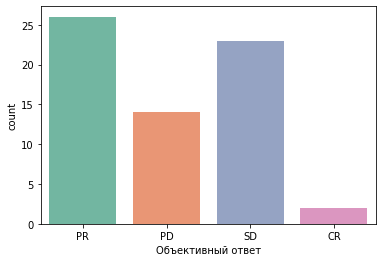

In [39]:
sns.countplot(x = 'Объективный ответ', data = data_final, palette='Set2')

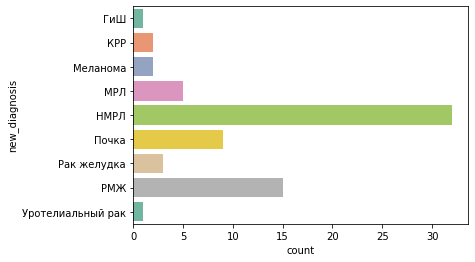

In [40]:
sns.countplot(y = 'new_diagnosis', data = data_final, palette='Set2')

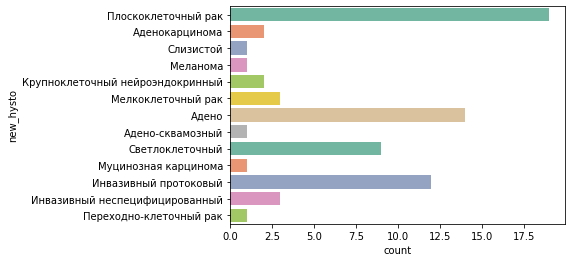

In [41]:
sns.countplot(y = 'new_hysto', data = data_final, palette='Set2')

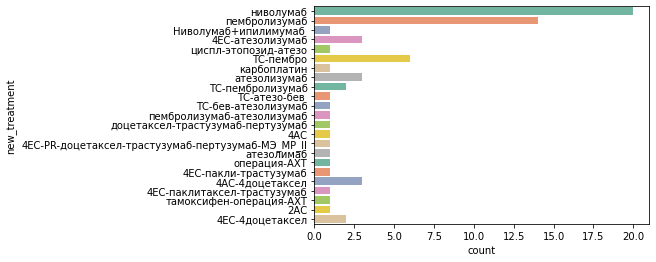

In [42]:
sns.countplot(y = 'new_treatment', data = data_final, palette='Set2')

In [43]:
data_final['Есть прогр - 1 или нет - 0'].value_counts(dropna = False)

0.0    46
1.0    22
NaN     2
Name: Есть прогр - 1 или нет - 0, dtype: int64

In [44]:
data_final['Клиническое состояние при прогрессировании'].value_counts(dropna = False)

NaN             27
без динамики    26
ухудшение        9
улучшение        8
Name: Клиническое состояние при прогрессировании, dtype: int64

In [45]:
data_final['Объективный ответ'].value_counts(dropna = False)

PR     26
SD     23
PD     14
NaN     5
CR      2
Name: Объективный ответ, dtype: int64

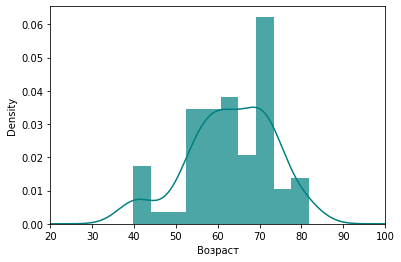

In [46]:
ax = data_final["Возраст"].hist( density=True,  color='teal', alpha=0.7)
data_final["Возраст"].plot(kind='density', color='teal')
ax.set(xlabel='Возраст')
plt.xlim(20,100)
plt.show()